In [1]:
# Importing the libraries
import numpy as np
import pandas as pd

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import train_test_split
from matplotlib import pyplot

from sklearn.metrics import recall_score, precision_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [2]:
# define f0.5 score
from sklearn.metrics import fbeta_score, make_scorer
f05_score = make_scorer(fbeta_score, beta=0.5)

# Benchmark Using Imbalanced Data

In [3]:
def compareAlgorithmsForBarChart(X_train, y_train):
  
    # prepare configuration for cross validation test harness
    seed = 7

    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('Linear SVC', LinearSVC()))
    models.append(('GNB', GaussianNB()))
    models.append(('MLP', MLPClassifier()))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('ADABOOST', AdaBoostClassifier()))


    # evaluate each model in turn
    
    names = []
    precision_results=[]
    recall_results=[]
    auc_results=[]
    f05_results=[]
    
    # make splits for cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=False)
    
    for name, model in models:
        names.append(name)

        # calculate scores
            
        precision_cv_results = model_selection.cross_val_score(model, X_train,
                                                               y_train, cv=skf, scoring='precision')
        recall_cv_results = model_selection.cross_val_score(model, X_train,
                                                            y_train, cv=skf, scoring='recall')
        auc_cv_results = model_selection.cross_val_score(model, X_train,
                                                         y_train, cv=skf, scoring='roc_auc')
        f05_cv_results = model_selection.cross_val_score(model, X_train,
                                                         y_train, cv=skf, scoring=f05_score)

        precision_results.append(precision_cv_results.mean())
        print(precision_results)    # for testing only
        recall_results.append(recall_cv_results.mean())
        print(recall_results)    # for testing only
        auc_results.append(auc_cv_results.mean())
        print(auc_results)    # for testing only
        f05_results.append(f05_cv_results.mean())
        print(f05_results)    # for testing only
        
        
    return precision_results, recall_results, auc_results, f05_results, names

In [4]:
# make stratified folds for cross validation
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=False)

# make feature matrix and target matrix
X = pd.read_csv("featuresMatrix_Preprocessed_OHEColumnsNamed.csv")
y = pd.read_csv("dependentVariableLGAEncoded.csv")

# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

import warnings
#ignore warnings 
warnings.filterwarnings("ignore")

In [5]:
precision_results, recall_results, auc_results, f05_results, names = compareAlgorithmsForBarChart(X_train,y_train)

[0.0]
[0.0]
[0.7746236559139785]
[0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.7746236559139785, 0.7286021505376344]
[0.0, 0.0]
[0.0, 0.0, 0.016666666666666666]
[0.0, 0.0, 0.2]
[0.7746236559139785, 0.7286021505376344, 0.4835483870967742]
[0.0, 0.0, 0.020408163265306124]
[0.0, 0.0, 0.016666666666666666, 0.0]
[0.0, 0.0, 0.2, 0.0]
[0.7746236559139785, 0.7286021505376344, 0.4835483870967742, 0.7477419354838709]
[0.0, 0.0, 0.020408163265306124, 0.0]
[0.0, 0.0, 0.016666666666666666, 0.0, 0.0]
[0.0, 0.0, 0.2, 0.0, 0.2]
[0.7746236559139785, 0.7286021505376344, 0.4835483870967742, 0.7477419354838709, 0.4866666666666667]
[0.0, 0.0, 0.020408163265306124, 0.0, 0.2]
[0.0, 0.0, 0.016666666666666666, 0.0, 0.0, 0.2]
[0.0, 0.0, 0.2, 0.0, 0.2, 0.2]
[0.7746236559139785, 0.7286021505376344, 0.4835483870967742, 0.7477419354838709, 0.4866666666666667, 0.7445161290322581]
[0.0, 0.0, 0.020408163265306124, 0.0, 0.2, 0.2]


# Resampling

In [6]:
def compareAlgorithmsRUS(X_train, y_train):

    # prepare configuration for cross validation test harness
    seed = 7

    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('Linear SVC', LinearSVC()))
    models.append(('GNB', GaussianNB()))
    models.append(('MLP', MLPClassifier()))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('ADABOOST', AdaBoostClassifier()))



    # evaluate each model in turn
    precision_results = []
    recall_results = []
    auc_results = []
    f05_results = []

    names = []
        
    for name, model in models:
        skf = StratifiedKFold(n_splits=5, shuffle=False) 
    
        imba_pipeline = make_pipeline(RandomUnderSampler(random_state=42), model)
        
        precision_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring='precision')
        recall_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring='recall')
        auc_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf,
                                                         scoring='roc_auc')
        f05_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring=f05_score)

        precision_results.append(precision_cv_results.mean())
        recall_results.append(recall_cv_results.mean())
        auc_results.append(auc_cv_results.mean())
        f05_results.append(f05_cv_results.mean())

        names.append(name)
        #msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        #print(msg)
        
    #print("Precision Results:", precision_results)    
    #print("Recall Results:",recall_results)
    
    return precision_results, recall_results, auc_results, f05_results, names

In [7]:
def compareAlgorithmsSMOTE(X_train, y_train):

    # prepare configuration for cross validation test harness
    seed = 7

    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('Linear SVC', LinearSVC()))
    models.append(('GNB', GaussianNB()))
    models.append(('MLP', MLPClassifier()))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('ADABOOST', AdaBoostClassifier()))


    # evaluate each model in turn
    precision_results = []
    recall_results = []
    auc_results = []
    f05_results = []
    names = []
        
    for name, model in models:
        skf = StratifiedKFold(n_splits=5, shuffle=False)
        
        imba_pipeline = make_pipeline(SMOTE(random_state=42), model)
        
        precision_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring='precision')
        recall_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring='recall')
        auc_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf,
                                                         scoring='roc_auc')
        f05_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring=f05_score)

        precision_results.append(precision_cv_results.mean())
        recall_results.append(recall_cv_results.mean())
        auc_results.append(auc_cv_results.mean())
        f05_results.append(f05_cv_results.mean())
        names.append(name)
        #msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        #print(msg)
        
    #print("Precision Results:", precision_results)    
    #print("Recall Results:",recall_results)
    
    return precision_results, recall_results, auc_results, f05_results, names

In [8]:
# RUS results
precision_rus, recall_rus, auc_rus, f05_rus, names= compareAlgorithmsRUS(X_train, y_train)

# SMOTE results
precision_sm, recall_sm, auc_sm, f05_sm, names= compareAlgorithmsSMOTE(X_train, y_train)

In [9]:
def barChartBalancing(imbalancedResults, rusResults, smoteResults, score, title):
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np

    #make font bigger
    font = {'size'   : 15}

    matplotlib.rc('font', **font)
    
    labels = names
    
    x = np.arange(len(labels))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots(figsize=(10,9))
    rects1 = ax.bar(x - width, imbalancedResults, width, label='Imbalanced Dataset')
    rects2 = ax.bar(x , rusResults, width, label='RandomUnderSampler')
    rects3 = ax.bar(x + width, smoteResults, width, label='SMOTE')
    

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(score)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend(loc='upper center')




    fig.tight_layout()

    plt.show()

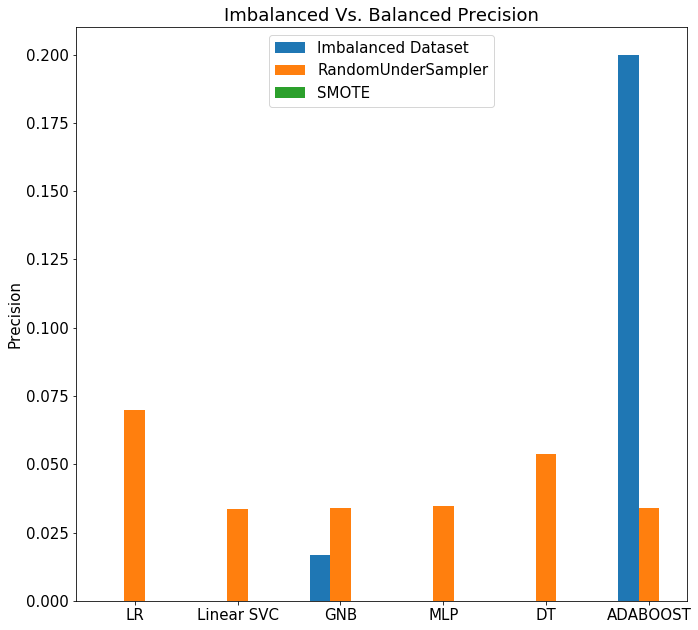

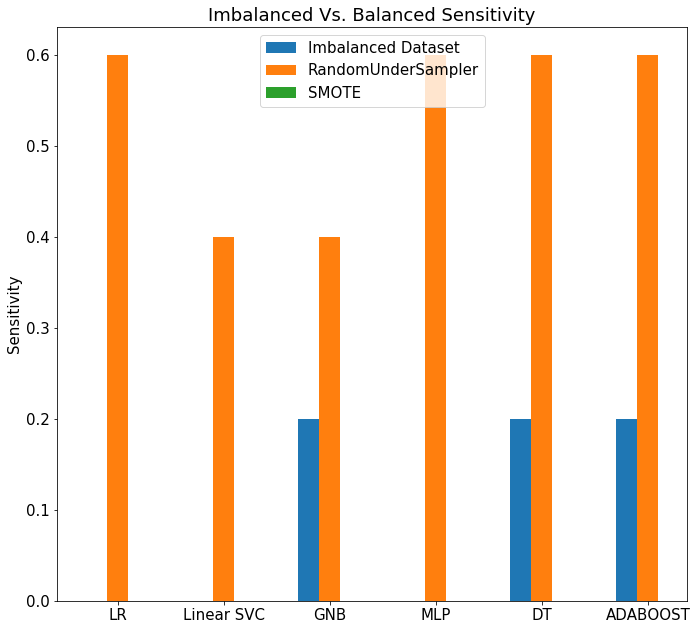

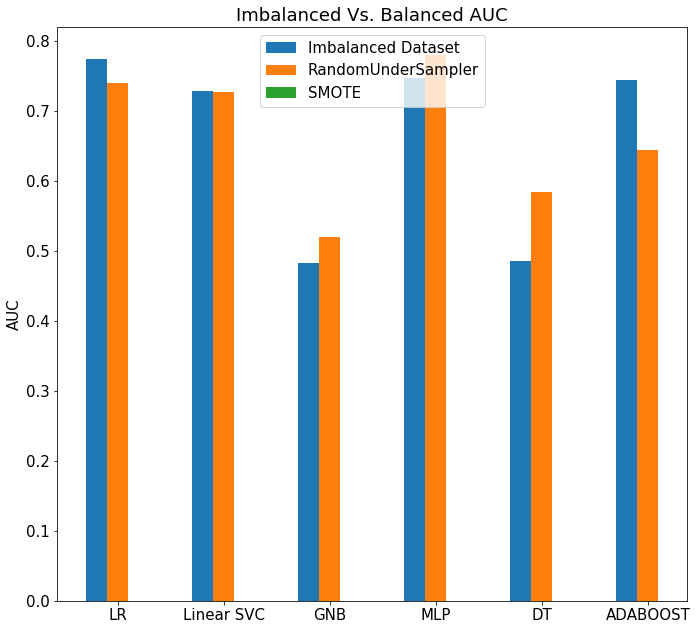

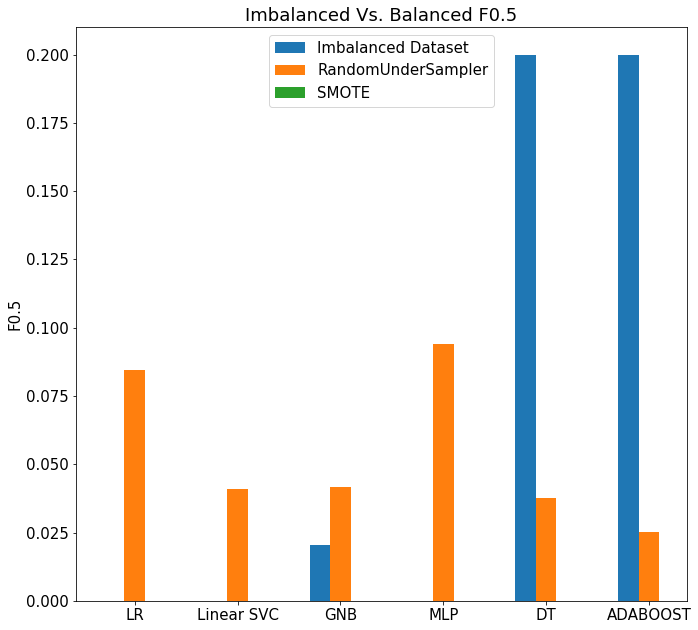

In [10]:
barChartBalancing(precision_results, precision_rus, precision_sm,
               "Precision", "Imbalanced Vs. Balanced Precision")
barChartBalancing(recall_results, recall_rus, recall_sm,
                "Sensitivity", "Imbalanced Vs. Balanced Sensitivity")
barChartBalancing(auc_results, auc_rus, auc_sm,
                "AUC", "Imbalanced Vs. Balanced AUC")
barChartBalancing(f05_results, f05_rus, f05_sm,
                "F0.5", "Imbalanced Vs. Balanced F0.5")